In [1]:
import pandas as pd
data = pd.read_csv('/Users/alhafeez/Documents/smt7/bengkod/seattle-weather.csv')
print(data.head(15))


          date  precipitation  temp_max  temp_min  wind  weather
0   2012-01-01            0.0      12.8       5.0   4.7  drizzle
1   2012-01-02           10.9      10.6       2.8   4.5     rain
2   2012-01-03            0.8      11.7       7.2   2.3     rain
3   2012-01-04           20.3      12.2       5.6   4.7     rain
4   2012-01-05            1.3       8.9       2.8   6.1     rain
5   2012-01-06            2.5       4.4       2.2   2.2     rain
6   2012-01-07            0.0       7.2       2.8   2.3     rain
7   2012-01-08            0.0      10.0       2.8   2.0      sun
8   2012-01-09            4.3       9.4       5.0   3.4     rain
9   2012-01-10            1.0       6.1       0.6   3.4     rain
10  2012-01-11            0.0       6.1      -1.1   5.1      sun
11  2012-01-12            0.0       6.1      -1.7   1.9      sun
12  2012-01-13            0.0       5.0      -2.8   1.3      sun
13  2012-01-14            4.1       4.4       0.6   5.3     snow
14  2012-01-15           

In [2]:
print(data.isnull().sum())
data = data.dropna()
data = data.drop(columns=['date'])
print(data.duplicated().sum())
data = data.drop_duplicates()
print(data.head())

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64
8
   precipitation  temp_max  temp_min  wind  weather
0            0.0      12.8       5.0   4.7  drizzle
1           10.9      10.6       2.8   4.5     rain
2            0.8      11.7       7.2   2.3     rain
3           20.3      12.2       5.6   4.7     rain
4            1.3       8.9       2.8   6.1     rain


<Axes: ylabel='count'>

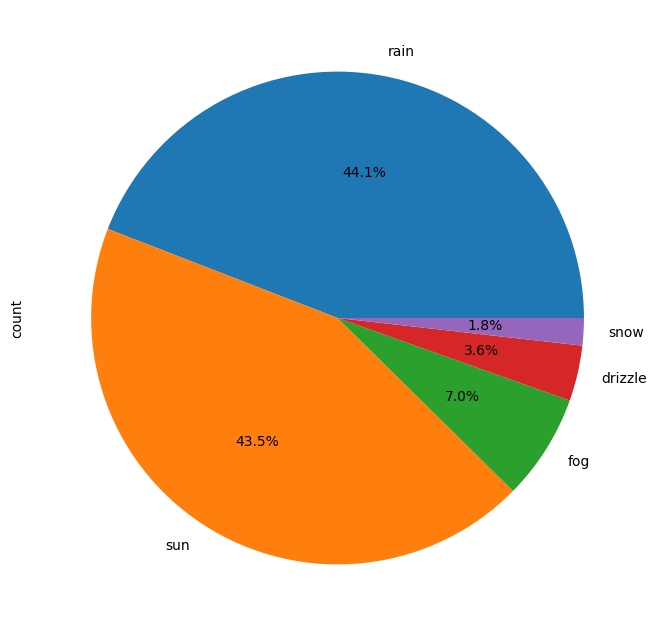

In [6]:
data['weather'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8))

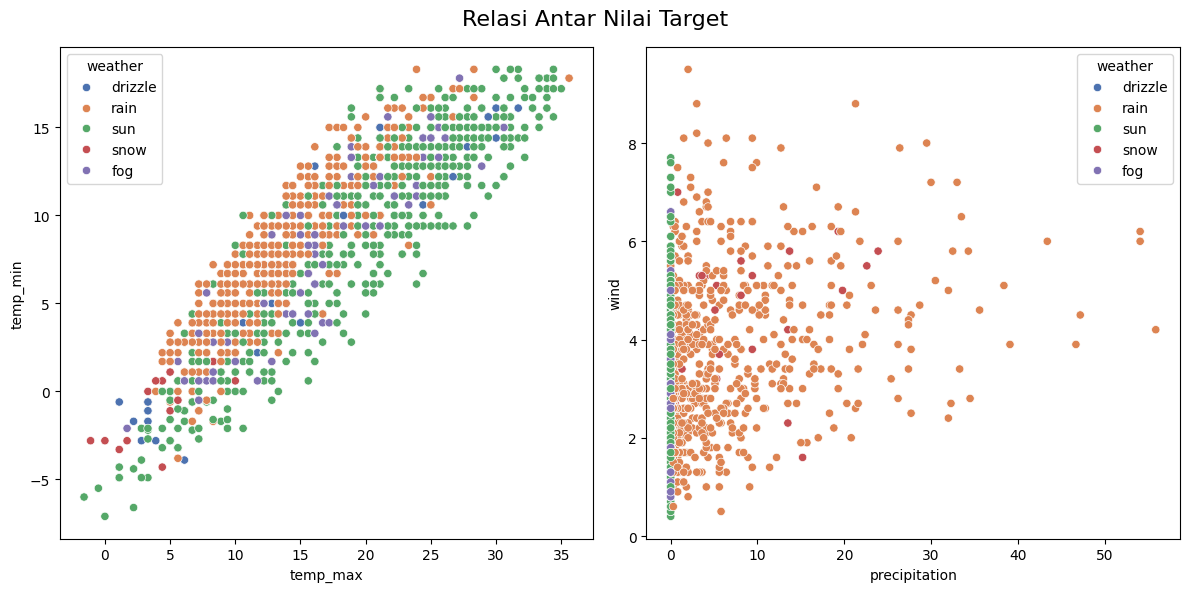

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(data=data, x='temp_max', y='temp_min', hue='weather', ax=axes[0], palette='deep')
sns.scatterplot(data=data, x='precipitation', y='wind', hue='weather', ax=axes[1], palette='deep')
fig.suptitle('Relasi Antar Nilai Target', fontsize=16)
plt.tight_layout()
plt.show()


In [22]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['weather'])
y = data['weather']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

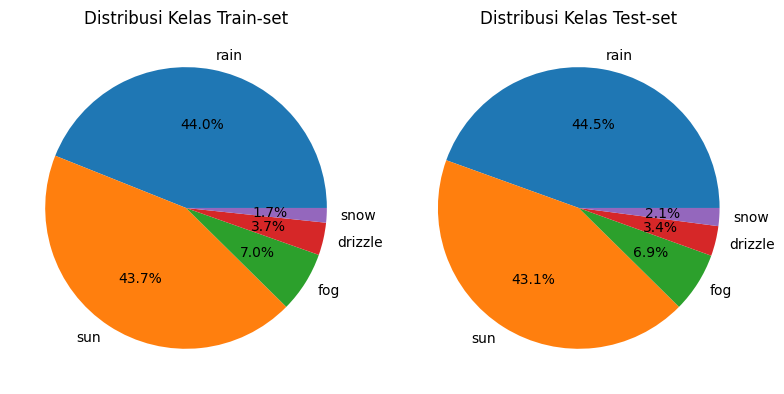

In [21]:
train_weather_counts = y_train.value_counts()
test_weather_counts = y_test.value_counts()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
train_weather_counts.plot.pie(autopct='%1.1f%%', title='Distribusi Kelas Train-set', figsize=(8, 8))
plt.ylabel('')
plt.subplot(1, 2, 2)
test_weather_counts.plot.pie(autopct='%1.1f%%', title='Distribusi Kelas Test-set', figsize=(8, 8))
plt.ylabel('')
plt.tight_layout()
plt.show()

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model KNN: {accuracy:.2f}')


Akurasi model KNN: 0.77


In [24]:
print("Kesimpulan: Proyek ini dimulai dengan mengimpor library yang diperlukan dan membaca dataset cuaca dari file CSV. "
      "Data kemudian dibersihkan dengan menghapus nilai kosong, kolom 'date', dan data duplikat. "
      "Distribusi kelas dalam kolom 'weather' divisualisasikan menggunakan diagram pie, sebelum membagi dataset "
      "menjadi train-set (70%) dan test-set (30%). Selanjutnya, diagram pie juga digunakan untuk menunjukkan "
      "distribusi kelas di kedua set. Model klasifikasi K-Nearest Neighbors (KNN) dibangun dan dilatih dengan "
      "train-set, kemudian diuji pada test-set. Akurasi model dihitung, memberikan gambaran tentang performa "
      "klasifikasi untuk memprediksi kategori cuaca berdasarkan fitur yang ada.")


Kesimpulan: Proyek ini dimulai dengan mengimpor library yang diperlukan dan membaca dataset cuaca dari file CSV. Data kemudian dibersihkan dengan menghapus nilai kosong, kolom 'date', dan data duplikat. Distribusi kelas dalam kolom 'weather' divisualisasikan menggunakan diagram pie, sebelum membagi dataset menjadi train-set (70%) dan test-set (30%). Selanjutnya, diagram pie juga digunakan untuk menunjukkan distribusi kelas di kedua set. Model klasifikasi K-Nearest Neighbors (KNN) dibangun dan dilatih dengan train-set, kemudian diuji pada test-set. Akurasi model dihitung, memberikan gambaran tentang performa klasifikasi untuk memprediksi kategori cuaca berdasarkan fitur yang ada.
